# Data preprocessing

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

## Experimenting, getting to know the data

In [2]:
filepath="./Data/training_set/"

In [3]:
filename="010_HC.png"

In [4]:
img=cv.imread(filepath+filename, 0)

In [5]:
new_img=np.expand_dims(img, axis=2)

In [6]:
new_img.shape

(540, 800, 1)

In [7]:
res=cv.resize(new_img,(640,432))

In [8]:
res=np.expand_dims(res, axis=2)

In [9]:
res.shape

(432, 640, 1)

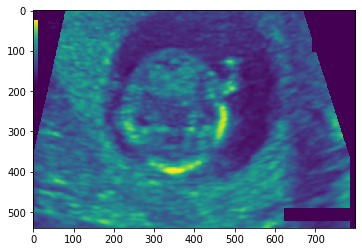

In [10]:
plt.imshow(img)

In [121]:
img_normed=(img-img.mean())/img.std()

In [13]:
max(img.ravel())

243

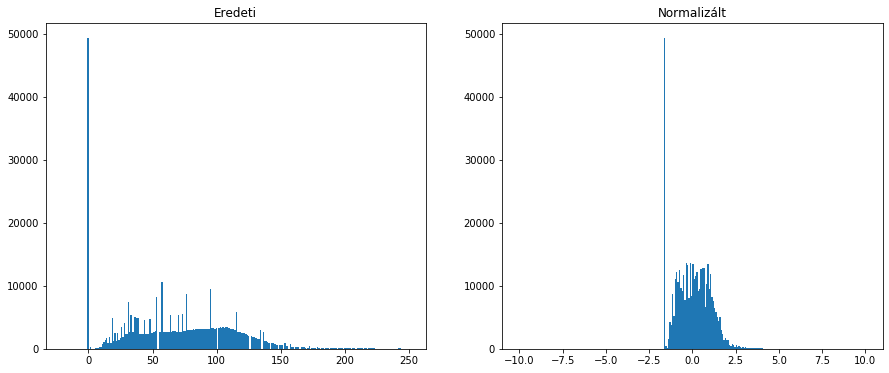

In [126]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(-20.0, 250.0))
plt.title("Eredeti")
plt.subplot(122)
plt.hist(img_normed.ravel(), bins=256, range=(-10.0, 10.0))
plt.title("Normalizált")
plt.show()

In [138]:
img_normed.shape

(540, 800)

In [139]:
resized=cv.resize(img_normed, (640,432))

In [141]:
resized.shape

(432, 640)

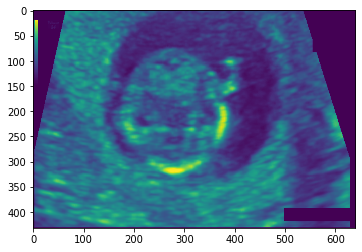

In [140]:
plt.imshow(resized)

In [24]:
edges=cv.Canny(img, 20, 20)

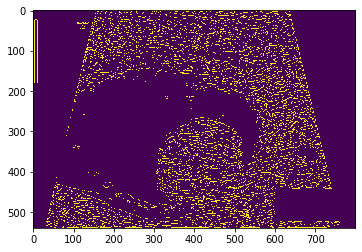

In [25]:
plt.imshow(edges)

## Reading all data

In [2]:
filepath="./Data/"

In [3]:
height=216 #432
width=320 #640
set_size=int(len(os.listdir(filepath))/2)

In [4]:
filenames= os.listdir(filepath)
filenames.sort()
filenames

['000_HC.png',
 '000_HC_Annotation.png',
 '001_HC.png',
 '001_HC_Annotation.png',
 '002_HC.png',
 '002_HC_Annotation.png',
 '003_HC.png',
 '003_HC_Annotation.png',
 '004_HC.png',
 '004_HC_Annotation.png',
 '005_HC.png',
 '005_HC_Annotation.png',
 '006_HC.png',
 '006_HC_Annotation.png',
 '007_HC.png',
 '007_HC_Annotation.png',
 '008_HC.png',
 '008_HC_Annotation.png',
 '009_HC.png',
 '009_HC_Annotation.png',
 '010_2HC.png',
 '010_2HC_Annotation.png',
 '010_HC.png',
 '010_HC_Annotation.png',
 '011_HC.png',
 '011_HC_Annotation.png',
 '012_HC.png',
 '012_HC_Annotation.png',
 '013_HC.png',
 '013_HC_Annotation.png',
 '014_2HC.png',
 '014_2HC_Annotation.png',
 '014_3HC.png',
 '014_3HC_Annotation.png',
 '014_HC.png',
 '014_HC_Annotation.png',
 '015_HC.png',
 '015_HC_Annotation.png',
 '016_HC.png',
 '016_HC_Annotation.png',
 '017_2HC.png',
 '017_2HC_Annotation.png',
 '017_HC.png',
 '017_HC_Annotation.png',
 '018_HC.png',
 '018_HC_Annotation.png',
 '019_2HC.png',
 '019_2HC_Annotation.png',
 '019_

In [17]:
first=os.listdir(filepath)[0]
first[-14:]

'Annotation.png'

In [16]:
second=os.listdir(filepath)[2]
second[-6:]

'HC.png'

In [22]:
np.zeros((set_size,height,width,1)).shape

(999, 432, 640, 1)

In [5]:
def make_training_set(filepath):
    filenames = os.listdir(filepath)
    filenames.sort()
    X_train = np.zeros((set_size,height,width,1), dtype='float32')
    y_train = np.zeros((set_size,height,width,1), dtype='float32')
    index_X = 0
    index_y = 0
    for filename in filenames:
        if filename[-6:]=='HC.png':
            X = cv.imread(filepath+filename, 0)
            X = cv.resize(X, (width,height))
            #X = (X-X.mean())/X.std()
            X = np.expand_dims(X, axis=2)
            X_train[index_X] = X
            index_X+=1
        elif filename[-14:]=='Annotation.png':
            y = cv.imread(filepath+filename, 0)
            y = y/255
            y = cv.resize(y, (width,height), interpolation=cv.INTER_NEAREST)
            y = np.expand_dims(y, axis=2)
            y_train[index_y] = y
            index_y+=1
    return (X_train, y_train)

In [6]:
X_train, y_train = make_training_set(filepath)

In [7]:
len(X_train)

999

In [8]:
X_train[0].shape

(216, 320, 1)

In [9]:
len(y_train)

999

In [10]:
uniq_X=np.unique(X_train)

In [11]:
print("len(np.unique): "+str(len(uniq_X)))
print("np.unique: ", uniq_X)

len(np.unique): 255
np.unique:  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190.

In [10]:
uniq_y=np.unique(y_train)

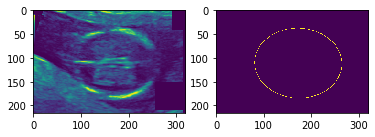

In [12]:
plt.subplot(121)
plt.imshow(np.squeeze(X_train[153], axis=2))
plt.subplot(122)
plt.imshow(np.squeeze(y_train[153], axis=2))
plt.show()

In [14]:
print("X_train")
print("dtype: "+str(X_train.dtype))
print("size: "+str(X_train.size))
print("shape: "+str(X_train.shape))
print("min: "+str(X_train.min()))
print("max: "+str(X_train.max()))
print("mean: "+str(X_train.mean()))
print("std: "+str(X_train.std()))
print("len(np.unique): "+str(len(uniq_X)))
print("np.unique: ", uniq_X)

X_train
dtype: float32
size: 276203520
shape: (999, 432, 640, 1)
min: -1.859419
max: 11.653363
mean: -1.8098174e-10
std: 1.0000005
len(np.unique): 242160
np.unique:  [-1.859419  -1.8234353 -1.7874517 ... 11.398934  11.500706  11.653363 ]


In [13]:
print("y_train")
print("dtype: "+str(y_train.dtype))
print("size: "+str(y_train.size))
print("shape: "+str(y_train.shape))
print("min: "+str(y_train.min()))
print("max: "+str(y_train.max()))
print("mean: "+str(y_train.mean()))
print("std: "+str(y_train.std()))
print("len(np.unique): "+str(len(uniq_y)))
print("np.unique: "+str(uniq_y))

y_train
dtype: float32
size: 276203520
shape: (999, 432, 640, 1)
min: 0.0
max: 1.0
mean: 0.007425474
std: 0.085853614
len(np.unique): 2
np.unique: [0. 1.]


## Writing the data into files

In [13]:
np.save('X_train', X_train)

In [14]:
np.save('y_train', y_train)